In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Datenimport
Quelle der Daten: https://data.milwaukee.gov/dataset/property-sales-data

In [2]:
FILEPATH_2020 = os.path.join("..", "input", "armslengthsales_2020_valid.csv")
FILEPATH_2021 = os.path.join("..", "input", "armslengthsales_2021_valid.csv")
FILEPATH_2022 = os.path.join("..", "input", "armslengthsales_2022_valid.csv")

In [3]:
df_2020 = pd.read_csv(FILEPATH_2020)
df_2021 = pd.read_csv(FILEPATH_2021)
df_2022 = pd.read_csv(FILEPATH_2022)

In [4]:
#df = pd.concat([df_2020, df_2021, df_2022])
df = df_2022

## EDA

### Beschreibung und Analyse des Datensatzes
Der Datensatz beinhaltet Verkaufsdaten über Wohnhäuser, Eigentumswohnungen, Gewerbeimmobilien, Apartments und unbebaute Grundstücke. <br>
<br>
7146 Zeilen<br>
8168 fehlende Werte<br>
20 Variablen

```PropertyID``` - Enthält die eindeutige ID der Immobilie  
```PropType``` - Enthält den Typ der Immobilie - 6 verschiedene mit Anteil in %: 81,4% Residential (Wohnimmobilien), 13% Condominium (Eigentumswohnungen), 3% Large Apartment (Große Wohnungen), 2,6% Commercial (Gewerbeimmobilien), <0,1% Manufacturing (Produktionsstätten), <0,1% Exempt (Andere)  
```taxkey``` - Enthält die eindeutige Steuerliche Kennung der Immobilie  
```Address``` - Enthält die Adresse der Immobilie  
```CondoProject``` - Nur für Condominium (Eigentumswohnungen) relevant - enthält einen Projektnamen  
```District``` - Nummer des Districts (Stadtteil) von Milwaukee  
```nbhd``` - Nummer der "Nachbarschaft" - vermutlich eine detaillierte Einteilung der Districts  
```Style``` - Enthält die "Art" der Immobilie wie Ranch, Townhouse und Medical Clinic  
```Extwall``` - Beschreibt die Außenverkleidung der Immobilie wie Aluminium/Vinyl, Wood (Holz) oder Bricks (Ziegel)  
```Stories```- Enthält die Anzahl der Stockwerke der Immobilie  
```Year_Built``` - Enthält das Baujahr der Immobilie  
```Rooms``` - Enthält die Anzahl der Räume der Immobilie  
```FinishedSqft``` - Beschreibt die Gesamtfläche in Quadrratfuß der Immobilie an 1 Quardratfuß = 0,092903 Quadratmeter  
```Units``` - Enthält die Anzahl an Wohneineinheiten der Immobilie  
```Bdrms``` - Enthält die Anzahl an Schlafzimmern der Immobilie  
```Fbath``` - Enthält die Anzahl an "Vollbädern" (Badezimmer mit Badewanne/Dusche) der Immobilie  
```Hbath``` - Enthält die Anzahl an "Halbbädern" (Badezimmer ohne Badewanne/Dusche) der Immobilie  
```Lotsize``` - Enthält die Größe des Grundstücks, auf dem die Immobilie steht
```Sale_date``` - Enthält das Datum, an dem die Immobilie verkauft wurde
```Sale_prize```

### Fehlende Werte prüfen und entfernen

In [5]:
# Entfernen der irrelevanten Spalten
df.drop('PropertyID', axis=1, inplace=True)
df.drop('taxkey', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('CondoProject', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropType      7146 non-null   object 
 1   District      7146 non-null   int64  
 2   nbhd          7146 non-null   int64  
 3   Style         7125 non-null   object 
 4   Extwall       6220 non-null   object 
 5   Stories       7107 non-null   float64
 6   Year_Built    7135 non-null   float64
 7   Rooms         6703 non-null   float64
 8   FinishedSqft  7122 non-null   float64
 9   Units         7146 non-null   int64  
 10  Bdrms         6703 non-null   float64
 11  Fbath         7146 non-null   int64  
 12  Hbath         7146 non-null   int64  
 13  Lotsize       7146 non-null   int64  
 14  Sale_date     7146 non-null   object 
 15  Sale_price    7146 non-null   float64
dtypes: float64(6), int64(6), object(4)
memory usage: 893.4+ KB


In [12]:
df.nunique()

PropType           6
District          15
nbhd             459
Style             81
Extwall           18
Stories           13
Year_Built       155
Rooms             40
FinishedSqft    2386
Units             49
Bdrms             24
Fbath              8
Hbath              4
Lotsize         1670
Sale_date        313
Sale_price      1284
dtype: int64

In [13]:
df.isna().sum()

PropType          0
District          0
nbhd              0
Style            21
Extwall         926
Stories          39
Year_Built       11
Rooms           443
FinishedSqft     24
Units             0
Bdrms           443
Fbath             0
Hbath             0
Lotsize           0
Sale_date         0
Sale_price        0
dtype: int64

In [14]:
df.isna().sum() / df.isna().count()

PropType        0.000000
District        0.000000
nbhd            0.000000
Style           0.002939
Extwall         0.129583
Stories         0.005458
Year_Built      0.001539
Rooms           0.061993
FinishedSqft    0.003359
Units           0.000000
Bdrms           0.061993
Fbath           0.000000
Hbath           0.000000
Lotsize         0.000000
Sale_date       0.000000
Sale_price      0.000000
dtype: float64

In [16]:
corr = df.select_dtypes(exclude=["object"]).corr().round(2)
corr

,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
District,1.00,0.35,0.04,-0.06,0.07,0.00,-0.01,0.06,-0.00,0.01,0.01,0.00
nbhd,0.35,1.00,0.15,0.00,-0.16,0.17,0.09,-0.19,-0.25,-0.11,0.01,0.19
Stories,0.04,0.15,1.00,0.09,0.34,0.34,0.32,0.30,0.17,0.08,0.00,0.28
Year_Built,-0.06,0.00,0.09,1.00,-0.27,0.03,0.01,-0.20,0.07,0.09,0.01,0.04
Rooms,0.07,-0.16,0.34,-0.27,1.00,0.32,0.23,0.88,0.46,0.00,0.06,0.00
FinishedSqft,0.00,0.17,0.34,0.03,0.32,1.00,0.54,0.39,-0.15,-0.05,0.62,0.81
Units,-0.01,0.09,0.32,0.01,0.23,0.54,1.00,0.27,-0.09,-0.04,0.06,0.55
Bdrms,0.06,-0.19,0.30,-0.20,0.88,0.39,0.27,1.00,0.36,0.04,0.11,0.02
Fbath,-0.00,-0.25,0.17,0.07,0.46,-0.15,-0.09,0.36,1.00,-0.03,-0.11,-0.12
Hbath,0.01,-0.11,0.08,0.09,0.00,-0.05,-0.04,0.04,-0.03,1.00,-0.01,-0.02


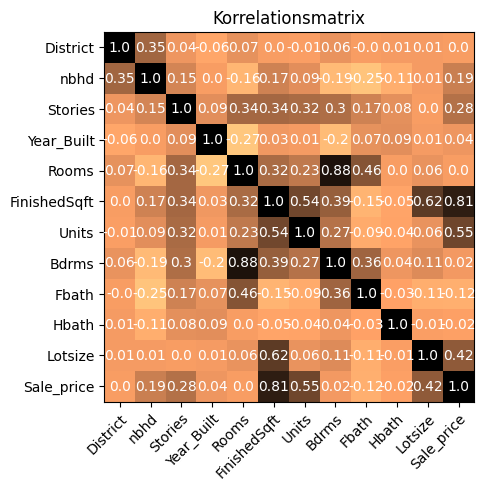

In [17]:
fig, ax = plt.subplots()
ax.imshow(corr, cmap=plt.get_cmap("copper_r"))
ax.set_xticks(np.arange(len(corr)), labels=corr.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=corr.columns.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, corr.iloc[i, j], ha="center", va="center", color="w")

ax.set_title("Korrelationsmatrix")
plt.show()

### Hinzufügen neuer zeitlicher Variablen

In [43]:
# Ersetzen des index durch die Spalte 'Sale_date'
df.set_index('Sale_date', inplace=True)

# Umwandeln des Datums in den Datentyp 'DatetimeIndex' 
df.index = pd.DatetimeIndex(df.index)

# Hinzufügen zeitlicher Variablen (Jahr, Monat, Tag und Kalenderwoche und das Datum erneut als Spalte)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.isocalendar().week
df['Sale_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])